In [14]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random

import seaborn as sns

sns.set(style="white")
sns.color_palette("deep")
sns.set_color_codes("deep")

In [8]:
orig = pd.read_csv('train_hand_final.csv')
extra = pd.read_csv('FT_tag_training.csv')

In [9]:
id = np.unique(np.array(orig['topic']))
topic = ['Technology', 'Consumer Services', 'Health Care', 'Consumer Goods', 
         'Basic Materials', 'Industrials','Financials','Oil & Gas','Utilities', 
         'Telecommunications','Other']
match = pd.DataFrame({'id':id, 'topic':topic})
match

,id,topic
0,id01,Technology
1,id02,Consumer Services
2,id03,Health Care
3,id04,Consumer Goods
4,id05,Basic Materials
5,id06,Industrials
6,id07,Financials
7,id08,Oil & Gas
8,id09,Utilities
9,id10,Telecommunications


In [11]:
#file = os.listdir('C:/Users/Joyce Yin/Desktop/Text mining group proj/preprocessing/dataset/ft1')
file = []
prefix = 'C:/Users/Joyce Yin/Desktop/Text mining group proj/preprocessing/dataset/'
for i in range(len(os.listdir(prefix))):
    add = 'ft' + str(i+1)
    file_add = os.listdir(prefix + add)
    file = file+file_add
    
file_sep = []
for f in file:
    file_sep.append(int(f.split('.',1)[0]))
print(len(file_sep))


idlist = []
topic = []

for i in file_sep:
    #print(i)
    if i in orig['docid'].tolist():
        find = orig[orig['docid'] == i]
        #print(find)
        for l in range(len(find)):
            if find.iloc[l,1]!="id11":
                #print(find.iloc[l,1])
                idlist.append(i)
                topic.append(find.iloc[l,1])
            else:
                if i in extra['docid'].tolist():
                    find_extra = extra[extra['docid'] == i]
                    idlist.append(i)
                    topic.append(find_extra.iloc[0,2])
            
    else:
        if i in extra['docid'].tolist():
            find_extra = extra[extra['docid'] == i]
            idlist.append(i)
            topic.append(find_extra.iloc[0,2])

60473


In [87]:
naive = pd.DataFrame({'ftid':idlist,'topic':topic})
for i in range(len(naive)):
    d = naive.loc[i, 'topic']
    if d in match['id'].tolist():
        adjust = match[match['id']== naive.loc[i, 'topic']].iloc[0,1]
        naive.loc[i, 'topic'] = adjust    
#naive
wholedataset = naive.copy()

### Histogram 1 For Whole Data

[   53   204   297  1427    64   186    73   151    30    49   116 17300
   334  9938  1222  1753  3865   207  8545  1209]


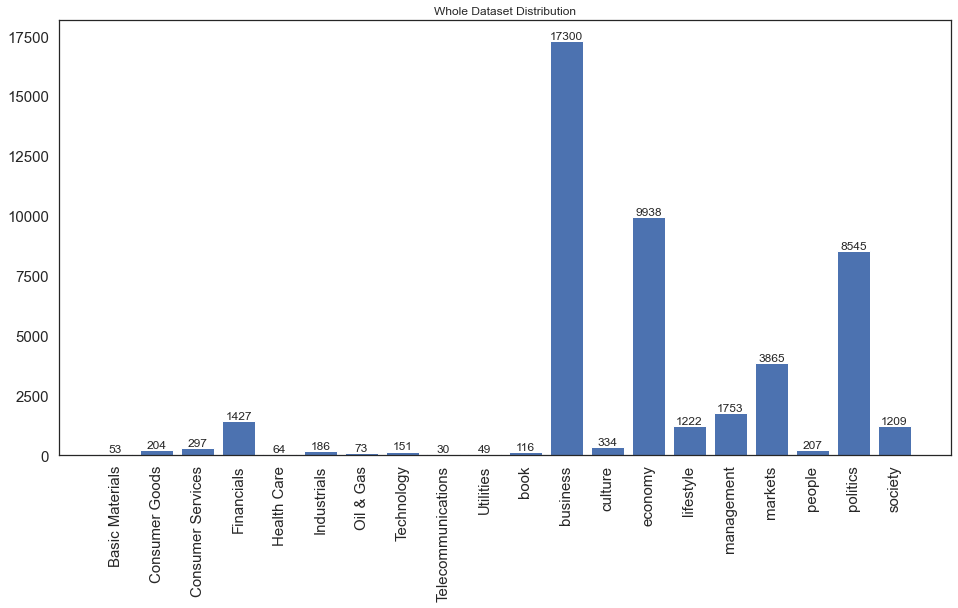

In [88]:
count1 = np.unique(np.array(naive['topic']),return_counts=True)
print(count1[1])
plt.figure(figsize=(16,8))
bar = plt.bar(count1[0],count1[1])
rotate = plt.xticks(rotation='vertical')
title = plt.title('Whole Dataset Distribution')
bar_label = plt.bar_label(bar, label_type='edge')
plt.tick_params(labelsize=15)

In [89]:
#get rid of the frequency less than 1000
out_topic1 = []
for i in range(len(count1[1])):
    if count1[1][i] < 1000:
        out_topic1.append(count1[0][i])
        
for i in out_topic1:
    naive = naive[naive['topic']!=i]

In [90]:
dataset1 = naive.copy()
dataset1

,ftid,topic
0,1001571,business
1,1005617,Financials
2,1005672,business
3,1005673,economy
4,1005676,business
...,...,...
47018,1091584,business
47019,1091585,politics
47020,1091588,markets
47021,1091589,politics


### Histogram 2 (labels features more than 1000) (Dataset 1 for Experiment 1)

[ 1427 17300  9938  1222  1753  3865  8545  1209]


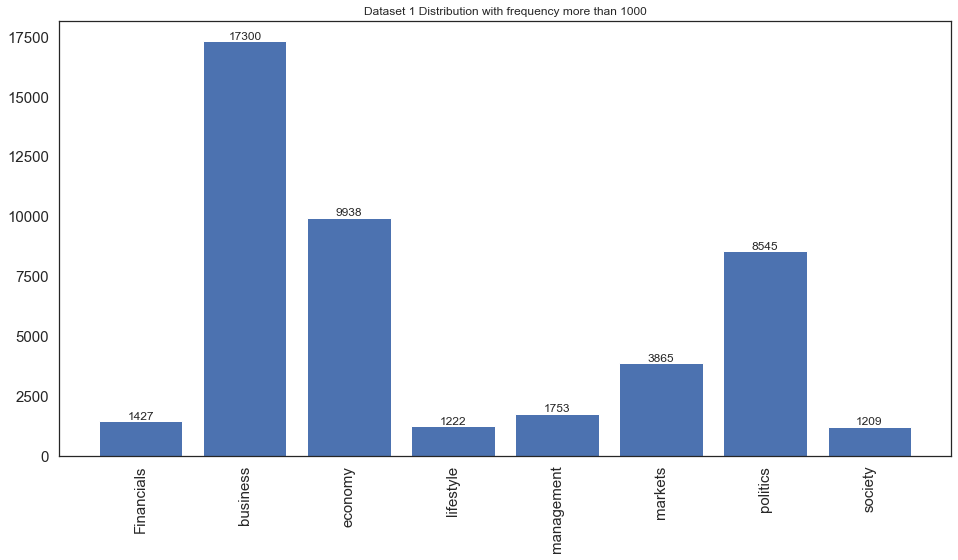

In [91]:
count2 = np.unique(np.array(naive['topic']),return_counts=True)
print(count2[1])
plt.figure(figsize=(16,8))
bar2 = plt.bar(count2[0],count2[1])
rotate2 = plt.xticks(rotation='vertical')
title2 = plt.title('Dataset 1 Distribution with frequency more than 1000')
bar_label2 = plt.bar_label(bar2, label_type='edge')
plt.tick_params(labelsize=15)

In [93]:
###make balanced ditributionn on eight topic
df = pd.DataFrame()
for i in count2[0]:
    topic_df = naive[naive['topic']==i]
    select_ind = random.sample(range(len(topic_df)), 1209)
    topic_df = topic_df.iloc[select_ind,:]
    df = pd.concat([df, topic_df], axis=0)
dataset2 = df
dataset2 = dataset2.reset_index()
dataset2 = dataset2.iloc[:,1:3]
dataset2

,ftid,topic
0,1013572,Financials
1,1007627,Financials
2,1021142,Financials
3,1008001,Financials
4,1030505,Financials
...,...,...
9667,1084764,society
9668,1081803,society
9669,1073503,society
9670,1052659,society


In [94]:
#get rid of the frequency less than 200
out_topic2 = []
for i in range(len(count2[1])):
    if count2[1][i] < 2000:
        out_topic2.append(count2[0][i])
        
for i in out_topic2:
    naive = naive[naive['topic']!=i]

In [95]:
dataset3 = naive.copy()
dataset3

,ftid,topic
0,1001571,business
2,1005672,business
3,1005673,economy
4,1005676,business
5,1005677,business
...,...,...
47018,1091584,business
47019,1091585,politics
47020,1091588,markets
47021,1091589,politics


### Histogram 3 (labels features more than 2000

[17300  9938  3865  8545]


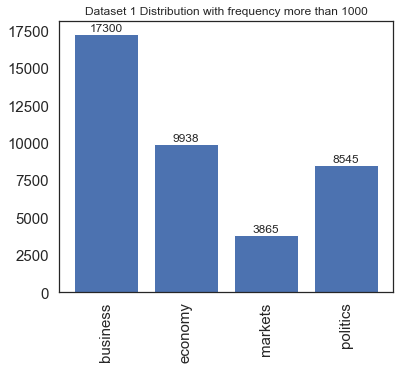

In [96]:
count3 = np.unique(np.array(naive['topic']),return_counts=True)
print(count3[1])
plt.figure(figsize=(6,5))
bar3 = plt.bar(count3[0],count3[1])
rotate3 = plt.xticks(rotation='vertical')
title3 = plt.title('Dataset 1 Distribution with frequency more than 1000')
bar_label3 = plt.bar_label(bar3, label_type='edge')
plt.tick_params(labelsize=15)

In [97]:
###make evenly ditributed
df2 = pd.DataFrame()
for i in count3[0]:
    topic_df = naive[naive['topic']==i]
    select_ind = random.sample(range(len(topic_df)), 3865)
    topic_df = topic_df.iloc[select_ind,:]
    df2 = pd.concat([df2, topic_df], axis=0)
dataset4 = df2
dataset4 = dataset4.reset_index()
dataset4 = dataset4.iloc[:,1:3]
dataset4

,ftid,topic
0,1055719,business
1,1016766,business
2,1033133,business
3,1058562,business
4,1021310,business
...,...,...
15455,1035565,politics
15456,1037165,politics
15457,1044410,politics
15458,1053578,politics


### Split training and testing set

In [107]:
def split_train_test(df, topiclist, filename):
    train_index = []
    test_index = []
    train = pd.DataFrame()
    test = pd.DataFrame()
    
    for i in topiclist:
        #print(i)
        long = len(df[df['topic'] == i])
        train_ind = random.sample(range(long), int(long*0.8))
        test_ind = [i for i in range(long) if i not in train_ind]

        topic_df_train = df[df['topic'] == i].iloc[train_ind,:]
        topic_df_test = df[df['topic'] == i].iloc[test_ind,:]

        train = pd.concat([train, topic_df_train], axis=0)
        test = pd.concat([test, topic_df_test], axis=0)

    train_data = train.sort_values(by=['ftid'])
    test_data = test.sort_values(by=['ftid'])
    
    train_data.to_csv(filename + "train.csv",index=False)
    test_data.to_csv(filename + "test.csv", index=False)
    #return train_data, test_data

In [108]:
split_train_test(dataset1, count2[0], 'dataset1')
split_train_test(dataset2, count2[0], 'dataset2')
split_train_test(dataset3, count3[0], 'dataset3')
split_train_test(dataset4, count3[0], 'dataset4')